# Linear Regression ML Project

Linear regression is used to predict the value of a dependent variable(variable labeled on the y-axis) based on the value of the independent variable(variable labeled on the x-axis).  



In [ ]:
import pandas as pd #Allows us to use Python library for data manipulation and analysis
#Allows us to mplement machine learning models and statistical modelling
from sklearn.model_selection import train_test_split #train_test_split divides our data into train and test sets
from sklearn.linear_model import LinearRegression #We're gonna use Linear Regression algorithm for this dataset
import matplotlib.pyplot as plt #Allows us to make interactive figures and graphs
from google.colab import drive #Allows us to import files from Google Drive
drive.mount("/content/gdrive", force_remount=True)

df = pd.read_csv('/content/gdrive/MyDrive/Life_Expectancy.csv') #Gets data from CSV file located on my Google Drive
df


Mounted at /content/gdrive


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.isna().sum() #Checks for the number of NaN values in the columns in the dataset


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df.describe() #summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
print(df.shape) #Checks the number of rows and columns in dataframe. The dataframe has 1649 rows and 22 columns
df= df.dropna() #Removes the rows that contains NULL values.
print(df.shape) #Looks like there was some NULL values because the dropna() removes the rows

(2938, 22)
(1649, 22)


In [ ]:
print(df.isna().sum()) #checks if there is anymore NULL values
print(df.dtypes) #returns a Series with the data type of each column.

df.isin(["  ","?","Na","na","NA","null","NULL"]).sum() #checks if there is anymore NULL values through possible types of nulls
print(df.shape)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
A

In [ ]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.corr() #Looks for pairwise correlation for all the columns in the data. There can be a positive or negative correlation.

<ipython-input-6-651e01755fb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Looks for pairwise correlation for all the columns in the data. There can be a positive or negative correlation.


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


<ipython-input-7-c4c3253d5103>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=2,cmap="viridis") #Displays heatmap of dataframe correlation


<Axes: >

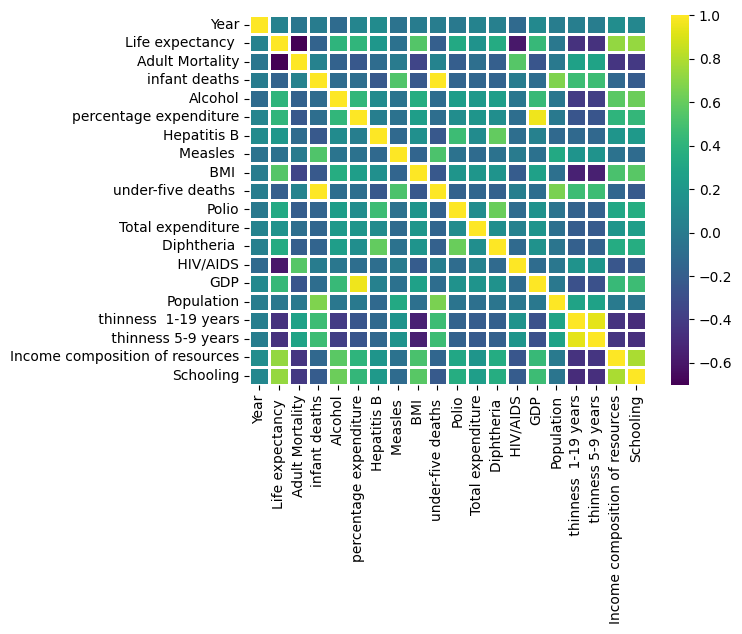

In [ ]:
import seaborn as sns #Allows us to use the visualization library for statistical graphics plotting
sns.heatmap(df.corr(),linewidths=2,cmap="viridis") #Displays heatmap of dataframe correlation

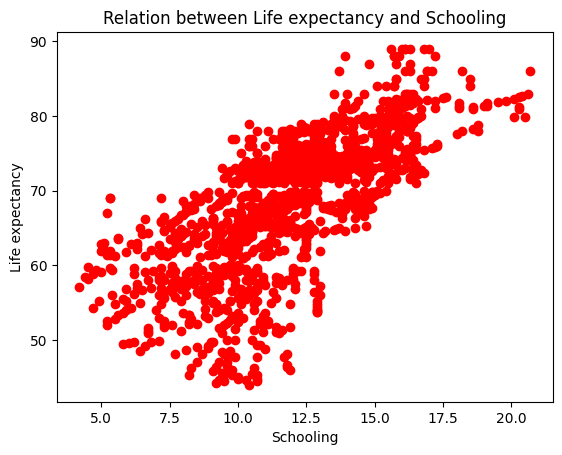

In [ ]:
plt.scatter(df["Schooling"], df["Life expectancy "], color #Visualize data points on Schooling and Life expectancy
           = "red")
plt.title("Relation between Life expectancy and Schooling") #labels title

plt.xlabel("Schooling") #labels the x-axis
plt.ylabel("Life expectancy") #labels the y-axis
plt.show() #Shows the scatterplot
# Here we make use of the matplotlib.pyplot library to display a scatter plot to show the relation between life expectancy and schooling

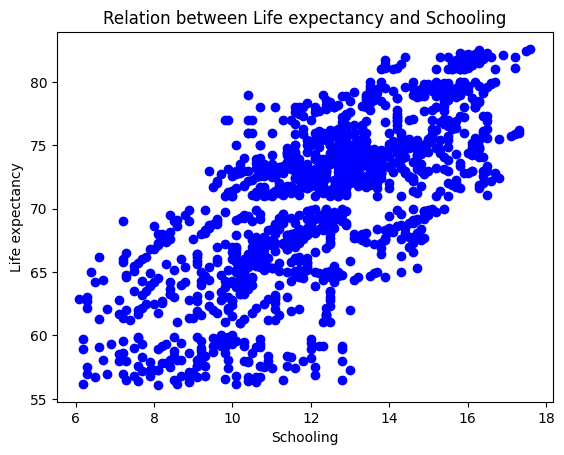

In [ ]:
data = df[(df["Schooling"] > 6) & (df["Schooling"] < 18) & (df["Life expectancy "] > 56) & (df["Life expectancy "] < 83)]
# After viewing the 1st scatterplot, we noticed that there are some outlier(abnormal) data. So here I'm going to filter some of the outlier data.

plt.scatter(data["Schooling"], data["Life expectancy "], color
           = "blue")
plt.title("Relation between Life expectancy and Schooling")

plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()
# As a result, the scatterplot looks a bit more linear. Doing this will allow our machine learning application to be a bit more accurate.

In [ ]:
desired_features = ["Schooling"] #We're gonna use the Schooling feature from the dataframe(x-value)

target = data["Life expectancy "] #We're gonna use the Life expectancy feature from the dataframe(y-value)
features = data[desired_features]

features_train, features_test, target_train, target_test  = train_test_split(features, target, test_size = 0.2, random_state = 6)


"""
The train_test_split() method is going to shuffle the data and split the data into train and test sets. First, we need to divide our data into
features (X) and target (y). The dataframe gets divided into features_train, features_test, target_train, and target_test.
features_train and target_train sets are used for training and fitting the model. So 20% of the data will contain
features_test & target_test and the other 80% will contain features_train & target_train.
"""

'\nThe train_test_split() method is going to shuffle the data and split the data into train and test sets. First, we need to divide our data into \nfeatures (X) and target (y). The dataframe gets divided into features_train, features_test, target_train, and target_test. \nfeatures_train and target_train sets are used for training and fitting the model. So 20% of the data will contain \nfeatures_test & target_test and the other 80% will contain features_train & target_train.\n'

In [ ]:
lr = LinearRegression() #Creates a instance of the LinearRegression class
lr.fit(features_train, target_train)
"""
The linear regression model will analyze the relationship between features_train and target_train variables
. Then it will adjust its internal parameters to find the line of best fit that also minimizes the prediction error
"""


LinearRegression()

In [ ]:
lr.coef_ #Represents the slope of the best-fitting line.

array([1.83429936])

In [ ]:
lr.intercept_ #Represents the intercept where the best-fitting line crosses the y-axis.

48.10864969517015

In [ ]:
lr.score(features_test, target_test)
#Calculates the coefficient of determination (R-squared). R2 measures how well a linear regression model fits the data.
#R2 measures how close the points are to the line the model has drawn. It is a number between 0 and 1.

0.6155627785493059

In [ ]:
for times in range(5): #Repeat code inside for loop 5 times.
  test = data.sample() #returns a specified number of random rows from dataframe.
  test_features = test[desired_features] #Extracts the desired_features from the random rows. In this case, the Schooling feature.
  predictedLife = lr.predict(test_features) #Uses the trained linear regression model to predict life expectancy for the sampled row given the Schooling feature.
  print("Test Information") #Prints Test Information
  print(test[["Schooling"]]) #Prints a random row with just the Schooling data.
  print(f"Predicted Life Exectancy: {predictedLife} \n") #Prints the Predicted Life Excetancy using our trained linear regression model given the test_feature.

Test Information
      Schooling
2211       12.4
Predicted Life Exectancy: [70.85396176] 

Test Information
      Schooling
1207       12.1
Predicted Life Exectancy: [70.30367195] 

Test Information
     Schooling
151       11.6
Predicted Life Exectancy: [69.38652227] 

Test Information
      Schooling
2846       10.8
Predicted Life Exectancy: [67.91908278] 

Test Information
      Schooling
2145       13.7
Predicted Life Exectancy: [73.23855093] 



In [ ]:
years = input("How years of schooling did you receive?") #Asks user how much schooling they received
userPredict = lr.predict([[int(years)]])
#Uses the trained linear regression model to predict life expectancy using the user input data of schooling they receieved.
print(f"Predicted Life Exectancy: {userPredict} \n") #Prints the predicted Life Exectancy for the amount of schooling.


How years of schooling did you receive?25
Predicted Life Exectancy: [93.9661337] 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
